In [39]:
import warnings

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import plotly.express as px
import plotly.graph_objects as go

In [40]:
with open("./Dadca/results_10mil.json", "r") as file:
    result_file_1 = json.loads(file.read())
with open("./DQN/results.json", "r") as file:
    result_file_2 = json.loads(file.read())
result_file = result_file_1 + result_file_2

In [41]:
import re
result_df = pd.json_normalize(result_file)
result_df.rename(columns=lambda c: re.sub(r'^simulation_results.', '', c), inplace=True)
result_df.rename(columns=lambda c: re.sub(r'^simulation_config.', '', c), inplace=True)
result_df.sort_values(by='expected_throughput', ignore_index=True, inplace=True)
result_df

,completed_training_steps,controller,controller_config.reward_function,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.memory_size,controller_config.batch_size,controller_config.hidden_layer_size,...,campaign_config.concurrent_simulations,campaign_config.concurrent_testing,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward,controller.cum_avg_rewards,controller.losses,controller.epsilons,controller.step_bins
0,1000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,False,False,3.0,0.3,0.298102,0.055500,"[0.0, 0.0158187134502924, 0.03972474737767091,...",NaN,NaN,NaN
1,9000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,False,False,3.0,0.3,0.301722,0.055500,"[0.0, 0.0158187134502924, 0.03972474737767091,...",NaN,NaN,NaN
2,9000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,False,False,3.0,0.3,0.291257,0.055500,"[0.0, 0.0158187134502924, 0.03972474737767091,...",NaN,NaN,NaN
3,9000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,False,False,3.0,0.3,0.292747,0.055500,"[0.0, 0.0158187134502924, 0.03972474737767091,...",NaN,NaN,NaN
4,9000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,False,False,3.0,0.3,0.295246,0.055500,"[0.0, 0.0158187134502924, 0.03972474737767091,...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9175,5000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,False,False,13.0,1.3,1.245509,0.024800,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00125, 0...",NaN,NaN,NaN
9176,5000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,False,False,13.0,1.3,1.277520,0.024800,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00125, 0...",NaN,NaN,NaN
9177,9000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,False,False,13.0,1.3,1.267248,0.024800,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00125, 0...",NaN,NaN,NaN
9178,6000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,False,False,13.0,1.3,1.244555,0.012800,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00379787...",NaN,NaN,NaN


In [42]:
result_df.columns

Index(['completed_training_steps', 'controller',
       'controller_config.reward_function', 'controller_config.epsilon_start',
       'controller_config.epsilon_end', 'controller_config.learning_rate',
       'controller_config.gamma', 'controller_config.memory_size',
       'controller_config.batch_size', 'controller_config.hidden_layer_size',
       'controller_config.num_hidden_layers',
       'controller_config.target_network_update_rate',
       'controller_config.optimizing_rate', 'model_file', 'state',
       'mission_size', 'num_agents', 'sensor_generation_frequency',
       'sensor_generation_probability', 'sensor_packet_lifecycle',
       'simulation_steps', 'training', 'step_by_step', 'plots', 'verbose',
       'repetitions', 'campaign_config.training_steps',
       'campaign_config.testing_steps',
       'campaign_config.live_testing_frequency',
       'campaign_config.testing_repetitions',
       'campaign_config.concurrent_simulations',
       'campaign_config.concurrent

In [43]:
result_df.reset_index(inplace=True, names='campaign_id')
result_df.head()

,campaign_id,completed_training_steps,controller,controller_config.reward_function,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.memory_size,controller_config.batch_size,...,campaign_config.concurrent_simulations,campaign_config.concurrent_testing,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward,controller.cum_avg_rewards,controller.losses,controller.epsilons,controller.step_bins
0,0,1000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,False,False,3.0,0.3,0.298102,0.0555,"[0.0, 0.0158187134502924, 0.03972474737767091,...",NaN,NaN,NaN
1,1,9000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,False,False,3.0,0.3,0.301722,0.0555,"[0.0, 0.0158187134502924, 0.03972474737767091,...",NaN,NaN,NaN
2,2,9000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,False,False,3.0,0.3,0.291257,0.0555,"[0.0, 0.0158187134502924, 0.03972474737767091,...",NaN,NaN,NaN
3,3,9000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,False,False,3.0,0.3,0.292747,0.0555,"[0.0, 0.0158187134502924, 0.03972474737767091,...",NaN,NaN,NaN
4,4,9000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,False,False,3.0,0.3,0.295246,0.0555,"[0.0, 0.0158187134502924, 0.03972474737767091,...",NaN,NaN,NaN


In [44]:
import warnings
with warnings.catch_warnings():
    # Converting columns to numeric to improve visibility in graphs
    warnings.simplefilter("ignore")
    result_df['maximum_simulation_steps'] = pd.to_numeric(result_df['completed_training_steps'])
    result_df['mission_size'] = pd.to_numeric(result_df['mission_size'])
    result_df['num_agents'] = pd.to_numeric(result_df['num_agents'])
    result_df['Score'] = result_df['avg_throughput'] / result_df['expected_throughput']

# Renaming columns for aesthetics

In [45]:
final_df = result_df.copy()
final_df['controller'].replace({
    "<class 'Dadca.Dadca'>": 'DADCA',
    "<class 'DQNLearner.DQNLearner'>": 'Deep Q-Learning',
    "<class 'QLearning.QLearning'>": 'Q-Learning'
}, inplace=True)
final_df.rename({
    'mission_size': 'Mission Size',
    'num_agents': 'Number of Agents',
    'controller': 'Approach',
    'completed_training_steps': 'Training Steps'
}, axis='columns', inplace=True)

final_df

,campaign_id,Training Steps,Approach,controller_config.reward_function,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.memory_size,controller_config.batch_size,...,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward,controller.cum_avg_rewards,controller.losses,controller.epsilons,controller.step_bins,maximum_simulation_steps,Score
0,0,1000000,DADCA,unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.298102,0.055500,"[0.0, 0.0158187134502924, 0.03972474737767091,...",NaN,NaN,NaN,1000000,0.993674
1,1,9000000,DADCA,unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.301722,0.055500,"[0.0, 0.0158187134502924, 0.03972474737767091,...",NaN,NaN,NaN,9000000,1.005741
2,2,9000000,DADCA,unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.291257,0.055500,"[0.0, 0.0158187134502924, 0.03972474737767091,...",NaN,NaN,NaN,9000000,0.970858
3,3,9000000,DADCA,unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.292747,0.055500,"[0.0, 0.0158187134502924, 0.03972474737767091,...",NaN,NaN,NaN,9000000,0.975822
4,4,9000000,DADCA,unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.295246,0.055500,"[0.0, 0.0158187134502924, 0.03972474737767091,...",NaN,NaN,NaN,9000000,0.984152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9175,9175,5000000,DADCA,unique_packets,1,0.1,0.0005,0.99,10000,128,...,13.0,1.3,1.245509,0.024800,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00125, 0...",NaN,NaN,NaN,5000000,0.958084
9176,9176,5000000,DADCA,unique_packets,1,0.1,0.0005,0.99,10000,128,...,13.0,1.3,1.277520,0.024800,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00125, 0...",NaN,NaN,NaN,5000000,0.982708
9177,9177,9000000,DADCA,unique_packets,1,0.1,0.0005,0.99,10000,128,...,13.0,1.3,1.267248,0.024800,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00125, 0...",NaN,NaN,NaN,9000000,0.974806
9178,9178,6000000,DADCA,unique_packets,1,0.1,0.0005,0.99,10000,128,...,13.0,1.3,1.244555,0.012800,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00379787...",NaN,NaN,NaN,6000000,0.957350


# Analysing Q Learning training performance

In [46]:
# Plot configurations
grid_row_column = 'Mission Size'
grid_col_column = 'Number of Agents'
grid_hue_column = 'Approach'

result_df

,campaign_id,completed_training_steps,controller,controller_config.reward_function,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.memory_size,controller_config.batch_size,...,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward,controller.cum_avg_rewards,controller.losses,controller.epsilons,controller.step_bins,maximum_simulation_steps,Score
0,0,1000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.298102,0.055500,"[0.0, 0.0158187134502924, 0.03972474737767091,...",NaN,NaN,NaN,1000000,0.993674
1,1,9000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.301722,0.055500,"[0.0, 0.0158187134502924, 0.03972474737767091,...",NaN,NaN,NaN,9000000,1.005741
2,2,9000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.291257,0.055500,"[0.0, 0.0158187134502924, 0.03972474737767091,...",NaN,NaN,NaN,9000000,0.970858
3,3,9000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.292747,0.055500,"[0.0, 0.0158187134502924, 0.03972474737767091,...",NaN,NaN,NaN,9000000,0.975822
4,4,9000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.295246,0.055500,"[0.0, 0.0158187134502924, 0.03972474737767091,...",NaN,NaN,NaN,9000000,0.984152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9175,9175,5000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,13.0,1.3,1.245509,0.024800,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00125, 0...",NaN,NaN,NaN,5000000,0.958084
9176,9176,5000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,13.0,1.3,1.277520,0.024800,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00125, 0...",NaN,NaN,NaN,5000000,0.982708
9177,9177,9000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,13.0,1.3,1.267248,0.024800,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00125, 0...",NaN,NaN,NaN,9000000,0.974806
9178,9178,6000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,13.0,1.3,1.244555,0.012800,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00379787...",NaN,NaN,NaN,6000000,0.957350


In [47]:
q_learning_testing = final_df[~final_df['training']]

In [48]:
def grid_comparison_plot(df: pd.DataFrame, title: str, x: str, y: str):
    with sns.plotting_context("notebook", font_scale=1.3):
        grid = sns.FacetGrid(df, row=grid_row_column, col=grid_col_column, aspect=2)



        if grid_hue_column is not None:
            unique_hue_values = list(df[grid_hue_column].unique())
            grid.map_dataframe(sns.lineplot, x=x, y=y, hue=grid_hue_column, hue_order=unique_hue_values)
        else:
            grid.map_dataframe(sns.lineplot, x=x, y=y)

        grid.add_legend()

        grid.fig.subplots_adjust(top=0.8)
        grid.fig.suptitle(title, fontsize=20)

        plt.tight_layout()

        plt.show()

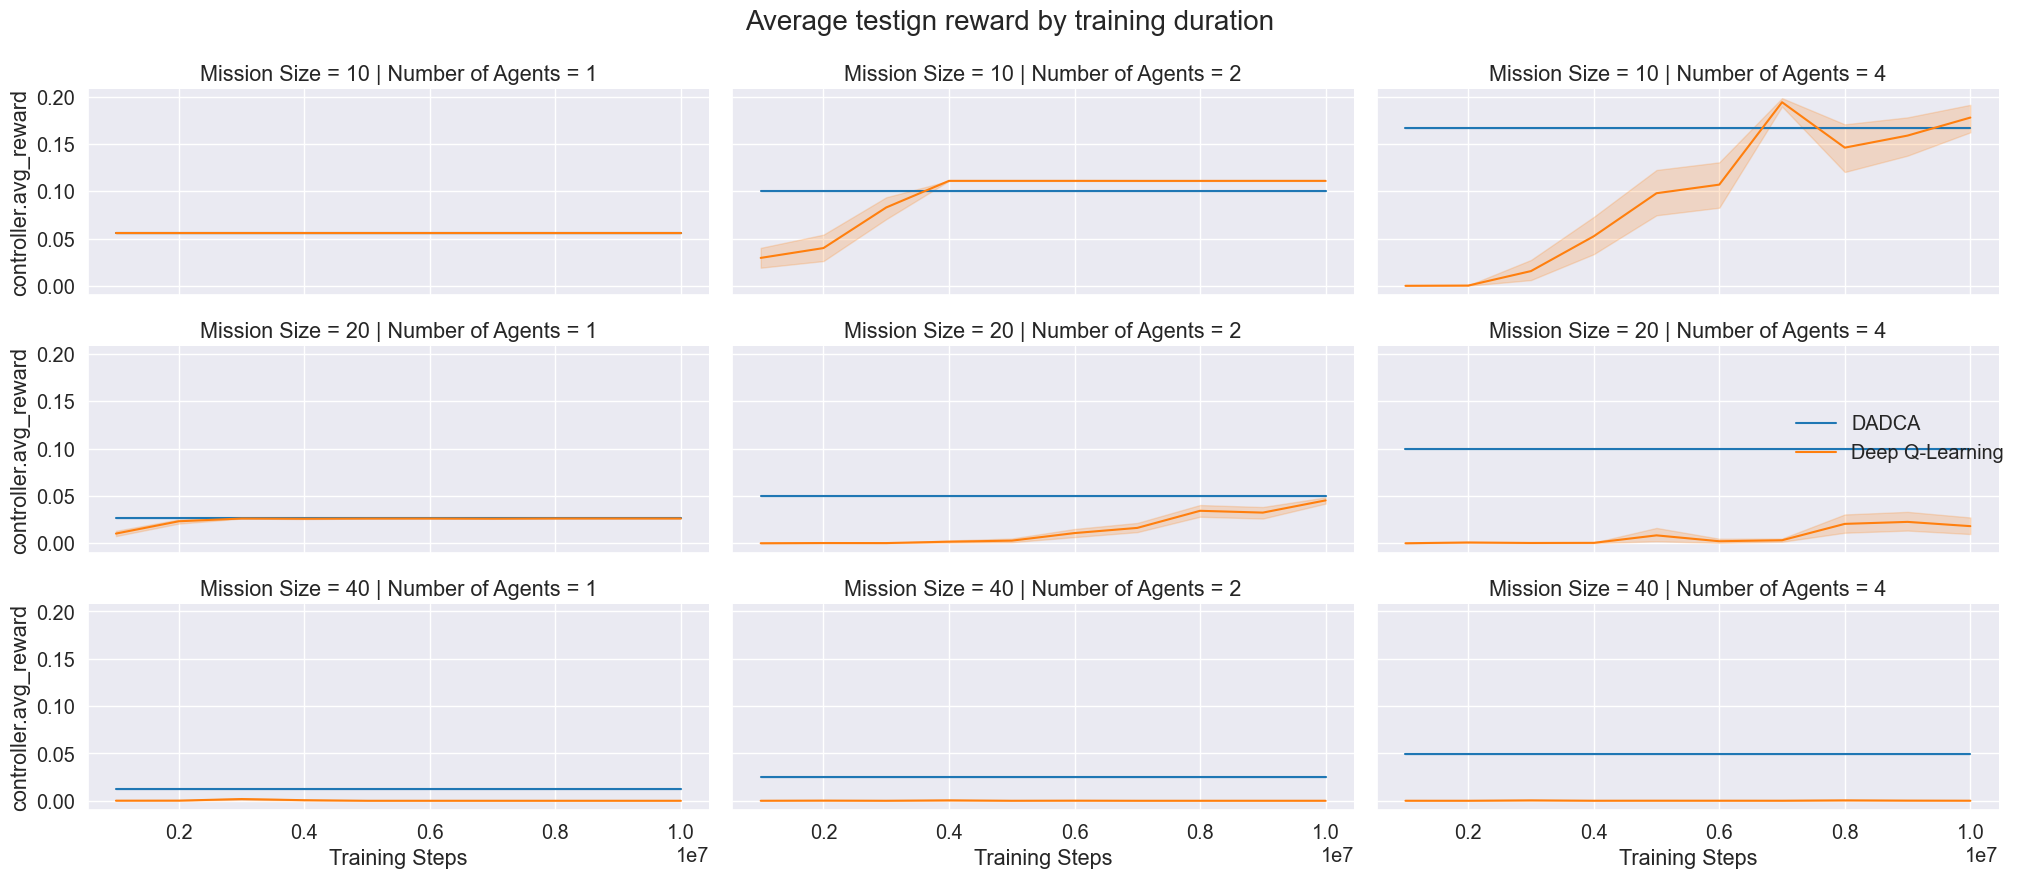

In [49]:
grid_comparison_plot(q_learning_testing, "Average testign reward by training duration", x='Training Steps', y='controller.avg_reward')

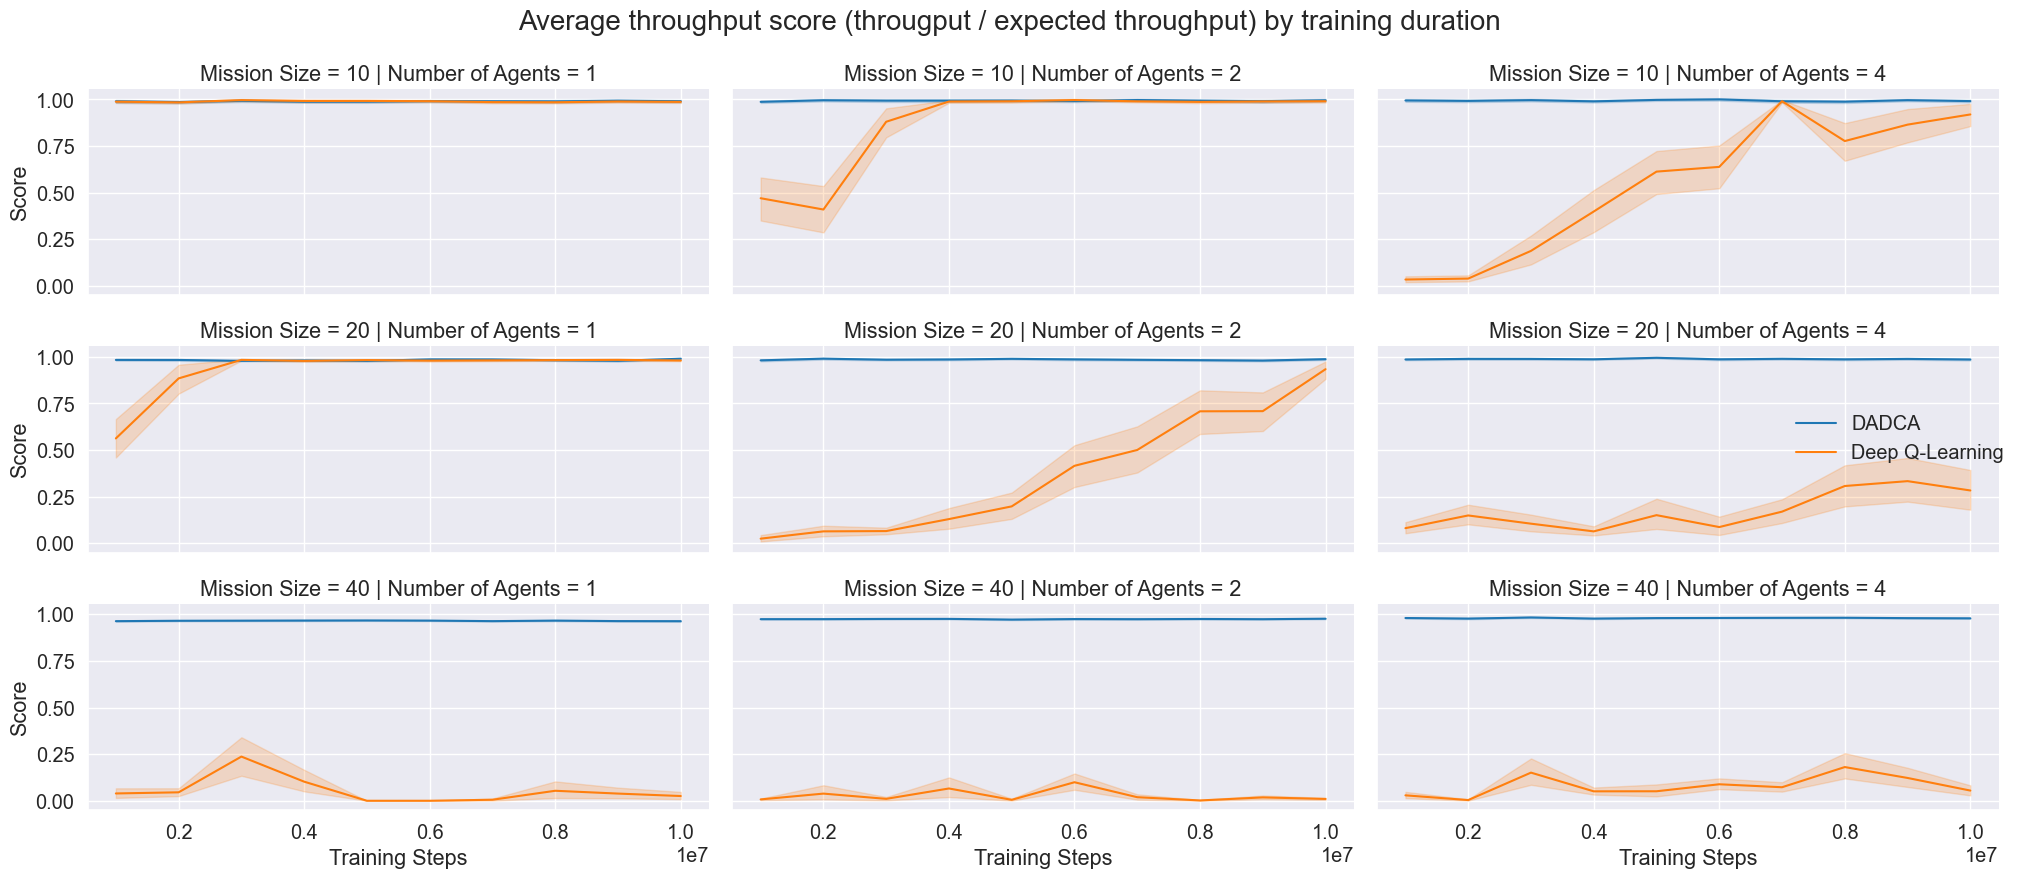

In [50]:
grid_comparison_plot(q_learning_testing, 'Average throughput score (througput / expected throughput) by training duration', x='Training Steps', y='Score')

In [51]:
q_learning_training = final_df[final_df['training']]
q_learning_training

,campaign_id,Training Steps,Approach,controller_config.reward_function,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.memory_size,controller_config.batch_size,...,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward,controller.cum_avg_rewards,controller.losses,controller.epsilons,controller.step_bins,maximum_simulation_steps,Score
26,26,10000000,DADCA,unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.300219,0.055556,"[0.05516964626913891, 0.055522817122153775, 0....",NaN,NaN,NaN,10000000,1.000729
186,186,10000000,DADCA,unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.300385,0.166666,"[0.16463652384567146, 0.1664760550808014, 0.16...",NaN,NaN,NaN,10000000,1.001283
231,231,10000000,DADCA,unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.300261,0.166666,"[0.16463652384567146, 0.1664760550808014, 0.16...",NaN,NaN,NaN,10000000,1.000869
272,272,10000000,DADCA,unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.300600,0.100000,"[0.09890941044691293, 0.0998994991590375, 0.09...",NaN,NaN,NaN,10000000,1.002001
361,361,10000000,Deep Q-Learning,unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.299827,0.087447,"[0.026853217547999145, 0.02574186447380871, 0....","[0.000516541178029729, 0.0010132277139945258, ...","[0.9988494755977144, 0.9965521855525032, 0.994...","[0.0, 10010.01001001001, 20020.02002002002, 30...",10000000,0.999422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9091,9091,10000000,Deep Q-Learning,unique_packets,1,0.1,0.0005,0.99,10000,128,...,13.0,1.3,1.298358,0.002798,"[0.0011318575545382558, 0.00145870746640825, 0...","[0.00016262369096511976, 0.0002290950292502939...","[0.9988494755977144, 0.9965521855525032, 0.994...","[0.0, 10010.01001001001, 20020.02002002002, 30...",10000000,0.998737
9137,9137,10000000,DADCA,unique_packets,1,0.1,0.0005,0.99,10000,128,...,13.0,1.3,1.299712,0.012821,"[0.01249006094928162, 0.01278631468064706, 0.0...",NaN,NaN,NaN,10000000,0.999779
9158,9158,10000000,Deep Q-Learning,unique_packets,1,0.1,0.0005,0.99,10000,128,...,13.0,1.3,1.277549,0.001666,"[0.000609659490085207, 0.0007073398168872808, ...","[6.284707226877799e-05, 9.426964272395803e-05,...","[0.9988494755977144, 0.9965521855525032, 0.994...","[0.0, 10010.01001001001, 20020.02002002002, 30...",10000000,0.982730
9165,9165,10000000,Deep Q-Learning,unique_packets,1,0.1,0.0005,0.99,10000,128,...,13.0,1.3,1.184660,0.000805,"[0.00010307341061934864, 0.0002993926304693505...","[8.726478586322628e-06, 1.9063001158730162e-05...","[0.9988494755977144, 0.9965521855525032, 0.994...","[0.0, 10010.01001001001, 20020.02002002002, 30...",10000000,0.911277


In [52]:
q_learning_training_exploded = q_learning_training.explode(['controller.cum_avg_rewards', 'controller.losses', 'controller.epsilons', 'controller.step_bins'])
q_learning_training_exploded.reset_index(names='step', inplace=True)
q_learning_training_exploded

ValueError: columns must have matching element counts

In [ ]:
grid_comparison_plot(q_learning_training_exploded, 'Cum. Avg. Reward by training step', x='controller.step_bins', y='controller.cum_avg_rewards')

In [ ]:
grid_comparison_plot(q_learning_training_exploded, 'Loss by training step', x='controller.step_bins', y='controller.losses')

In [ ]:
grid_comparison_plot(q_learning_training_exploded, 'Epsilon by training step', x='controller.step_bins', y='controller.epsilons')